xa   xb   yo
[[-2.206 -0.5   -2.   ]
 [-3.839 -1.    -4.8  ]
 [-5.358 -3.6   -5.2  ]]
Pa
[[ 0.176  0.047 -0.01 ]
 [ 0.047  0.149  0.045]
 [-0.01   0.045  0.178]]
Analysis and Background Errors
[[0.419 1.   ]
 [0.386 1.   ]
 [0.422 1.   ]]


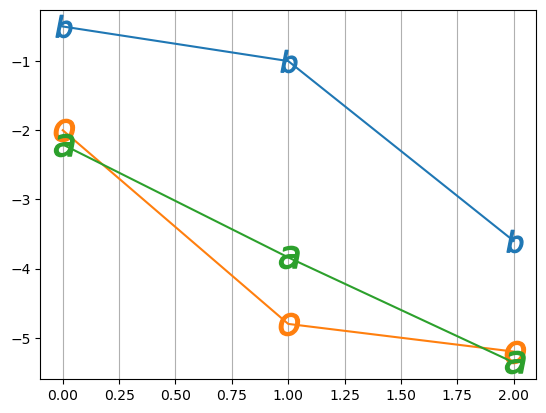

In [20]:
import numpy as np

# Stations: ELP, BGS, OKC

# Get observations (by interpolation)
yo = np.array([-2, -4.8, -5.2])

# Get forecast (by interpolation)
xb = np.array([-0.5, -1.0, -3.6])

# Since we already did the interpolation, construct H
H = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])

# calculate distances between stations
#d12=6378*acos(cos(31.8*pi/180)*cos(32.39*pi/180)*cos(-106.4*pi/180+101.48*pi/180)+sin(31.8*pi/180)*sin(32.39*pi/180));
d12=468 # ELP to BGS
d13=926.3 # ELP to OKC
d23=520.9 # BGS to OKC

d12=468 # ELP to BGS
d13=908.5 # ELP to OKC
d23=490.6 # BGS to OKC


# Forecast error variance
sigFs = 1**2
# Observation error variance
sigRs = 0.5**2

# Length scale of background error covariance function
L = 556

# Construct B
B = np.zeros((3, 3))
for i in range(3):
    for j in range(3):
        if i == j:
            B[i, j] = sigFs
        elif i == 0 and j == 1:
            B[i, j] = sigFs * np.exp(-0.5 * (d12 / L)**2)
        elif i == 0 and j == 2:
            B[i, j] = sigFs * np.exp(-0.5 * (d13 / L)**2)
        elif i == 1 and j == 0:
            B[i, j] = sigFs * np.exp(-0.5 * (d12 / L)**2)
        elif i == 1 and j == 2:
            B[i, j] = sigFs * np.exp(-0.5 * (d23 / L)**2)
        elif i == 2 and j == 0:
            B[i, j] = sigFs * np.exp(-0.5 * (d13 / L)**2)
        elif i == 2 and j == 1:
            B[i, j] = sigFs * np.exp(-0.5 * (d23 / L)**2)

# Construct observation error covariance (assume diagonal)
R = sigRs * np.eye(3)

# Calculate the weight matrix
W = np.dot(B, np.dot(H.T, np.linalg.inv(np.dot(H, np.dot(B, H.T)) + R)))

# Calculate your analysis
xa = xb + np.dot(B, np.dot(H.T, np.linalg.inv(np.dot(H, np.dot(B, H.T)) + R)).dot(yo - np.dot(H, xb)))
print('xa   xb   yo')
print(np.vstack([xa, xb, yo]).T.round(3))

# Calculate your analysis error
Pa = np.dot((np.eye(3) - np.dot(W, H)), B)
print('Pa')
print(Pa.round(3))
print('Analysis and Background Errors')
print(np.vstack([np.sqrt(np.diag(Pa)), np.sqrt(np.diag(B))]).T.round(3))

import matplotlib.pyplot as plt

plt.figure(1)
plt.plot(xb,marker='$b$',markersize=16)
plt.plot(yo,marker='$o$',markersize=16)
plt.plot(xa,marker='$a$',markersize=16)
plt.grid(axis='x')


In [21]:
from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider, FloatSlider, Layout, HBox, Label, VBox, RadioButtons
import ipywidgets as widgets

In [40]:
def all(
        L,sigFs,sigRs
        ):

    # Stations: ELP, BGS, OKC

    # Get observations (by interpolation)
    yo = np.array([-2, -4.8, -5.2])

    # Get forecast (by interpolation)
    xb = np.array([-0.5, -1.0, -3.6])

    # Since we already did the interpolation, construct H
    H = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])

    # calculate distances between stations
    #d12=6378*acos(cos(31.8*pi/180)*cos(32.39*pi/180)*cos(-106.4*pi/180+101.48*pi/180)+sin(31.8*pi/180)*sin(32.39*pi/180));
    d12=468 # ELP to BGS
    d13=926.3 # ELP to OKC
    d23=520.9 # BGS to OKC

    d12=468 # ELP to BGS
    d13=908.5 # ELP to OKC
    d23=490.6 # BGS to OKC

    # Forecast error variance
    #sigFs = 1**2
    # Observation error variance
    #sigRs = 0.5**2

    # Length scale of background error covariance function
    #L = 556

    # Construct B
    B = np.zeros((3, 3))
    for i in range(3):
        for j in range(3):
            if i == j:
                B[i, j] = sigFs
            elif i == 0 and j == 1:
                B[i, j] = sigFs * np.exp(-0.5 * (d12 / L)**2)
            elif i == 0 and j == 2:
                B[i, j] = sigFs * np.exp(-0.5 * (d13 / L)**2)
            elif i == 1 and j == 0:
                B[i, j] = sigFs * np.exp(-0.5 * (d12 / L)**2)
            elif i == 1 and j == 2:
                B[i, j] = sigFs * np.exp(-0.5 * (d23 / L)**2)
            elif i == 2 and j == 0:
                B[i, j] = sigFs * np.exp(-0.5 * (d13 / L)**2)
            elif i == 2 and j == 1:
                B[i, j] = sigFs * np.exp(-0.5 * (d23 / L)**2)

    # Construct observation error covariance (assume diagonal)
    R = sigRs * np.eye(3)

    # Calculate the weight matrix
    W = np.dot(B, np.dot(H.T, np.linalg.inv(np.dot(H, np.dot(B, H.T)) + R)))

    # Calculate your analysis
    xa = xb + np.dot(B, np.dot(H.T, np.linalg.inv(np.dot(H, np.dot(B, H.T)) + R)).dot(yo - np.dot(H, xb)))
    print('xa   xb   yo')
    print(np.vstack([xa, xb, yo]).T.round(3))

    # Calculate your analysis error
    Pa = np.dot((np.eye(3) - np.dot(W, H)), B)
    print('Pa')
    print(Pa.round(3))
    print('Analysis and Background Errors')
    print(np.vstack([np.sqrt(np.diag(Pa)), np.sqrt(np.diag(B))]).T.round(3))

    import matplotlib.pyplot as plt

    plt.figure(1, figsize=(10,3))
    plt.plot(xb,marker='$b$',markersize=16)
    plt.plot(yo,marker='$o$',markersize=16)
    plt.plot(xa,marker='$a$',markersize=16)
    plt.grid(axis='x')
    plt.title(f'Length Scale {L} km')
    plt.show()

sigFs = FloatSlider(min=0.0, max=10, step=0.1, value=1.0, description='Std. Dev of Background ',readout_format='.2f',
           layout=Layout(width='50%', height='20px'), style = {'description_width': '250px'})
sigRs = FloatSlider(min=0.0, max=10, step=0.1, value=0.5, description='Std. Dev of Observation ',readout_format='.2f',
           layout=Layout(width='50%', height='20px'), style = {'description_width': '250px'})

L =  IntSlider(min=10, max=1000, step=50, value=1.0, description='Length Scale ',readout_format='.0f',
           layout=Layout(width='50%', height='20px'), style = {'description_width': '250px'})



x = interactive(all, sigRs=sigRs, sigFs=sigFs, L=L)
# output = x.children[-1]
# output.layout.height = '750px'
display(x)


interactive(children=(IntSlider(value=10, description='Length Scale ', layout=Layout(height='20px', width='50%…

array([[0.7]])